In [11]:
import latent_space
from PIL import Image
import numpy as np
import output
from histology_main import get_session,close_session
from constants import FULL_OUTPUT_PATH, BATCH_SIZE, Z_NOISE_DIM
import tensorflow as tf
import dcgan_alt as dcgan

In [3]:
session, input_real, input_z = get_session(1)
z_batch_tensor = tf.random.uniform(
        (BATCH_SIZE, Z_NOISE_DIM), dtype=tf.float32, minval=-1, maxval=1)

INFO:tensorflow:Restoring parameters from /home/ruben/Master/checkpoints_level1/model-36000
36000


In [3]:
output.generate_samples(session, z_batch_tensor, input_z, BATCH_SIZE * 10, save_tensor=True, name_prefix="jupyter")

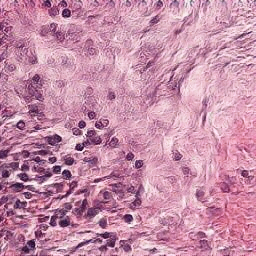

In [4]:
Image.open('/home/ruben/Master/output/jupyter_9_0.png')

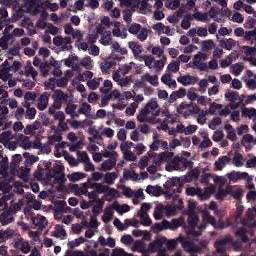

In [5]:
Image.open('/home/ruben/Master/output/jupyter_9_4.png')

In [6]:
#real_pos_image = Image.open('example_images/real/positive.jpeg')
#real_neg_image = Image.open('example_images/real/negative.jpeg')
#_, tensor_a = latent_space.search_image(session, real_pos_image)
#_, tensor_b = latent_space.search_image(session, real_neg_image)

tensor_neg = np.loadtxt(FULL_OUTPUT_PATH + 'jupyter_9_4.txt')
tensor_pos = np.loadtxt(FULL_OUTPUT_PATH + 'jupyter_9_0.txt')


In [ ]:
latent_space.interpolate(session, tensor_neg, tensor_pos, 128)

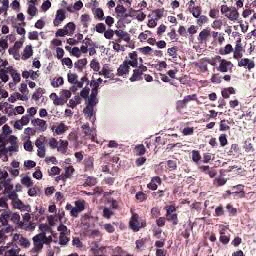

In [62]:
other_tensor = np.loadtxt(FULL_OUTPUT_PATH + 'jupyter_9_20.txt')
Image.open('/home/ruben/Master/output/jupyter_9_20.png')

In [71]:
sum_tensor = latent_space.substract_tensors(tensor_pos,tensor_neg)
sum_tensor = latent_space.add_tensors(other_tensor,sum_tensor)
sum_tensor = np.expand_dims(sum_tensor, 0)

z_ = tf.placeholder(tf.float32, [1, Z_NOISE_DIM])
samples = session.run(dcgan.sampler(z_,1), feed_dict={z_: sum_tensor})
img = np.squeeze(samples)
Image.fromarray(output.transform_image(output.image_from_array(img)).astype(np.uint8)).show()